In [1]:
from andi_datasets.models_phenom import models_phenom
from helpersMSD import *
from helpersGeneration import *
from helpersPlot import *
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [ ]:

nPosPerFrame = 10 
nFrames = 30 # = Seuence length
T = nFrames * nPosPerFrame
L=0
N=1

# number of trajectories
# values from Real data
background_mean,background_sigma = 1000, 100
part_mean, part_std = 5000 - background_mean, 500


image_props = {
    "particle_intensity": [
        part_mean,
        part_std,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 1.3,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": 15,
    "upsampling_factor": 5,
    "background_intensity": [
        background_mean,
        background_sigma,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 100,
    "trajectory_unit" : 1200
}

out_dir = "outPoster/videos/"

In [31]:
D=1

trajs, labels = models_phenom().single_state(N, 
                                L = L,
                                T = T,
                                Ds = [D, 0.0], # Mean and variance
                                alphas = 1)
print(trajs.shape,labels.shape)
# Need to reshape generated trajectories because they are in format (T,N,dim), but we want them in (N,T,dim)
trajs = trajs.transpose(1,0,2)
labels = labels.transpose(1,0,2)
print(trajs.shape,labels.shape)
# Labels are now in format (N,T,3): for each particle T times the tuple (alpha, D, state)
print(f"Particle 0 [alpha, Gen_D, state]: {labels[0,0,:]}")


(300, 1, 2) (300, 1, 3)
(1, 300, 2) (1, 300, 3)
Particle 0 [alpha, Gen_D, state]: [1. 1. 2.]


In [41]:
traj = np.load("outPoster/videos/D10/traj.npy")
trajmid = np.load("outPoster/videos/D5/traj.npy")
traj2 = np.load("outPoster/videos/D1/traj.npy")

#trajs = np.expand_dims(traj, axis=0)
print(trajs.shape)

traj_div_factor = 70 
# number of trajectories
# values from Real data
background_mean,background_sigma = 1000, 100
part_mean, part_std = 5000 - background_mean, 500
im_size = 11


image_props = {
    "particle_intensity": [
        part_mean,
        part_std,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 2,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": im_size,
    "upsampling_factor": 5,
    "background_intensity": [
        background_mean,
        background_sigma,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 100,
    "trajectory_unit" : 1200
}

vid = trajectories_to_video_multiple_settings(trajs/traj_div_factor,nPosPerFrame,center=True,image_props=image_props)
print(len(vid))
print(np.shape(vid[0]))
print(np.shape(vid[1]))


Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\debugpy\_vendored\pydevd\_pydevd_bundle\pydevd_vars.py", line 624, in change_attr_expression
    value = eval(expression, frame.f_globals, frame.f_locals)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
NameError: name 'array' is not defined. Did you forget to import 'array'


(1, 300, 2)
4
(1, 30, 11, 11)
(1, 30, 11, 11)


In [33]:


play_video(vid[0][0],#save_path=out_dir+"frames_hr.mp4")
)



vmin: 1.0575997814055854e-13 vmax: 3908.358154296875 mean: 121.44


In [34]:
cmap="gray" 
vmin=0
vmax=2500 
def save_image(image, fname):
    
    plt.imshow(image,cmap="gray" ,
vmin=vmin,
vmax=vmax)
    plt.axis('off')
    plt.savefig(out_dir + fname + ".png", dpi=200, bbox_inches='tight', pad_inches=0, format='png' )
    plt.close()

def save_sequence(seq, fname):
    for i in range(seq.shape[0]):
        save_image(seq[i],fname=fname+str(i))

save_sequence(vid[0][0], f'D{D}/')

In [ ]:
def plot1ParticleTrajectory(trajectory, nframes,save_path=None, max_scale=None):
    """
    Plots the trajectory of a particle, coloring each frame differently 
    and labeling each frame with its number.
    
    Parameters:
    - trajectory: np.ndarray of shape (N, 2), where N is the total number of points.
                  Each row represents the (x, y) coordinates of the particle.
    - nframes: int, number of frames to divide the trajectory into.
    - D: float, diffusion coefficient for annotation.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    x_min, x_max = np.min(trajectory[:, 0]), np.max(trajectory[:, 0])
    y_min, y_max = np.min(-trajectory[:, 1]), np.max(-trajectory[:, 1])
    
    # Find the maximum absolute value to create a symmetric plot
    x_size = x_max - x_min
    y_size = y_max - y_min

    if(x_size < y_size):
        diff = y_size-x_size
        x_min = x_min - diff/2
        x_max = x_max + diff/2
    else:
        diff = x_size-y_size
        y_min = y_min - diff/2
        y_max = y_max + diff/2

    # Set symmetric limits centered at origin
    if(max_scale is None):
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
    else:
        ax.set_xlim([-max_scale, max_scale])
        ax.set_ylim([-max_scale, max_scale])
    # Calculate points per frame
    points_per_frame = len(trajectory) // nframes
    
    # Plot trajectory segments with frame labels
    for f in range(nframes):
        start = f * points_per_frame
        end = (f + 1) * points_per_frame + (1 if f != nframes - 1 else 0)
        
        # Plot each frame's trajectory in a different color
        plt.plot(
            trajectory[start:end, 0], 
            -trajectory[start:end, 1], 
            lw=1.5, 
        )
    
    # Add legend and axis labels
    plt.axis('off')  
        # Increase the tick label size
    # Show the plot
    plt.tight_layout()
    if(save_path!=None):
        plt.savefig(save_path)
    plt.show()
    return

for i in [5,10,20,30]:
    subTraj = i
    plot1ParticleTrajectory(trajs[0], subTraj, save_path=out_dir+f"D{D}/traj{subTraj}.png")
np.save(out_dir+f"D{D}/traj.npy", trajs[0])

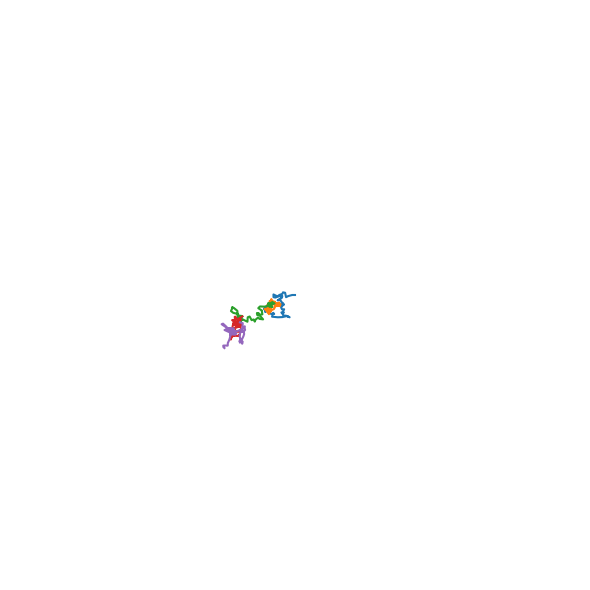

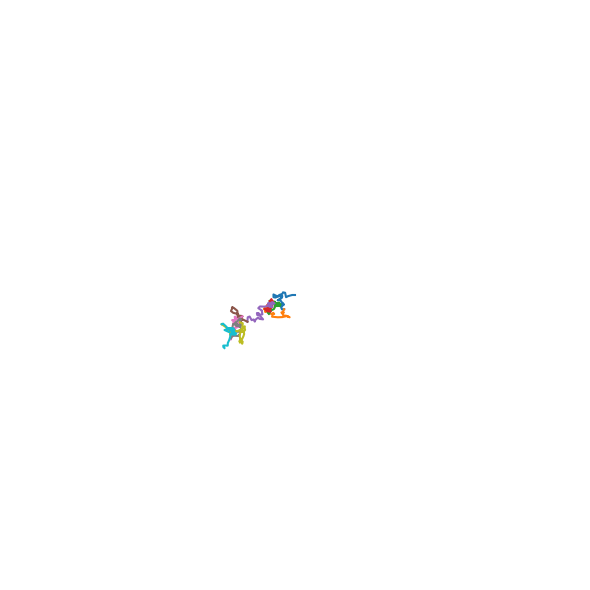

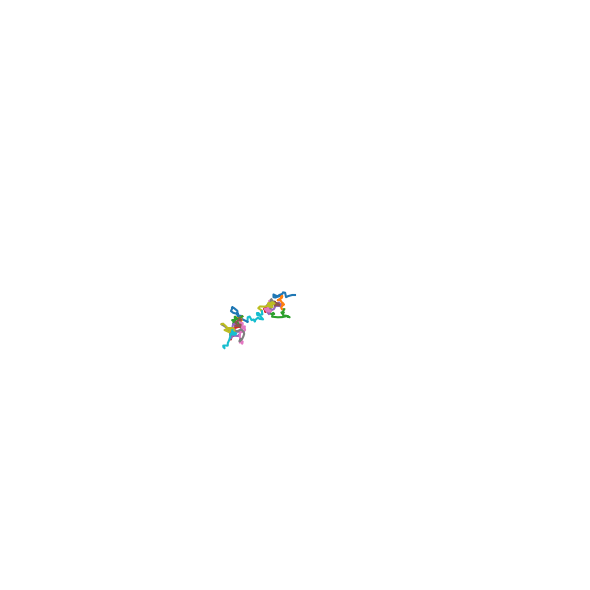

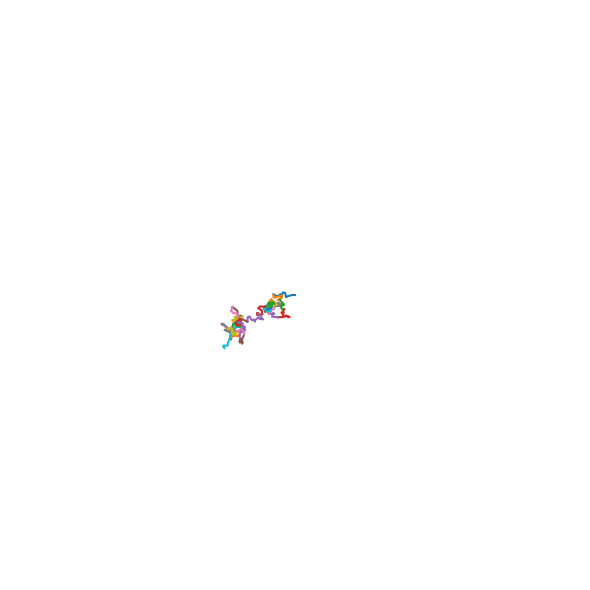

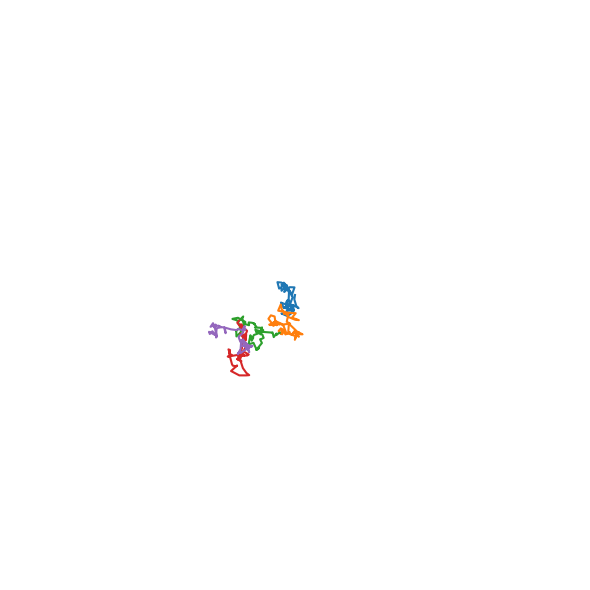

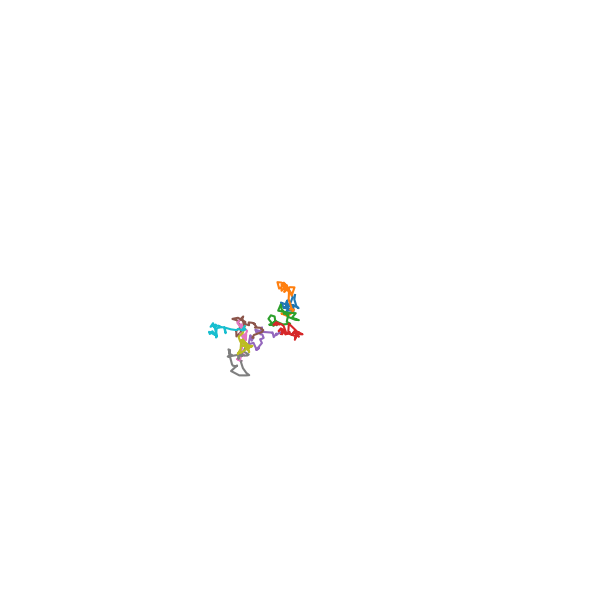

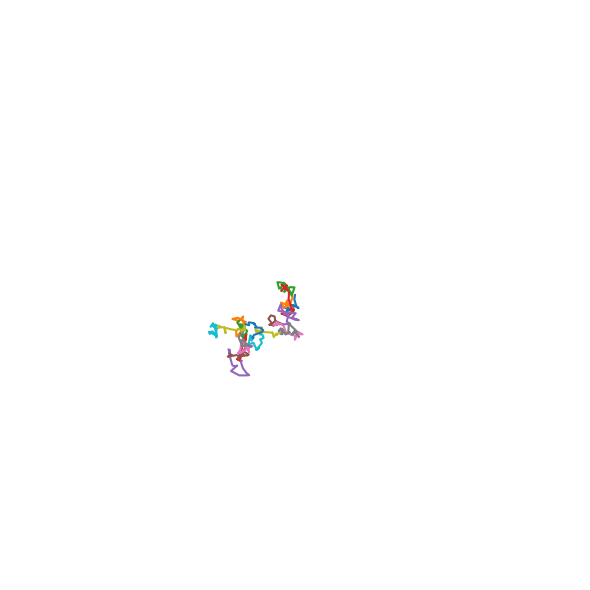

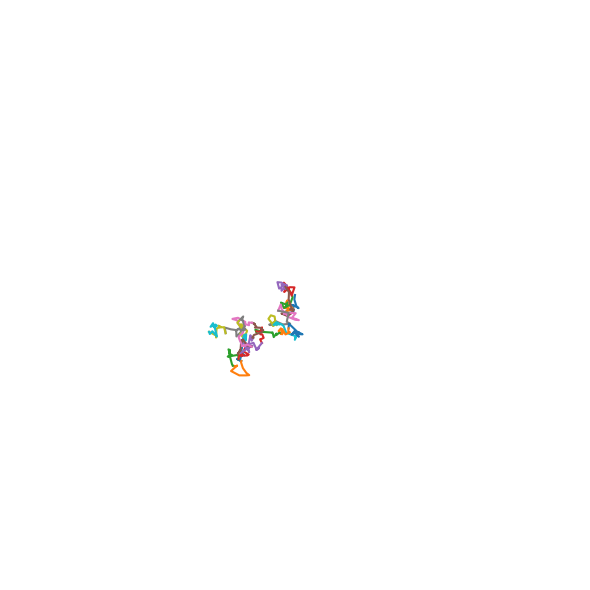

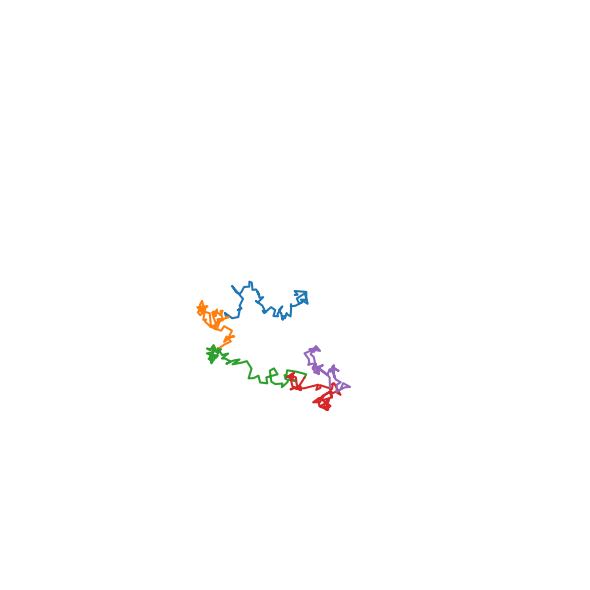

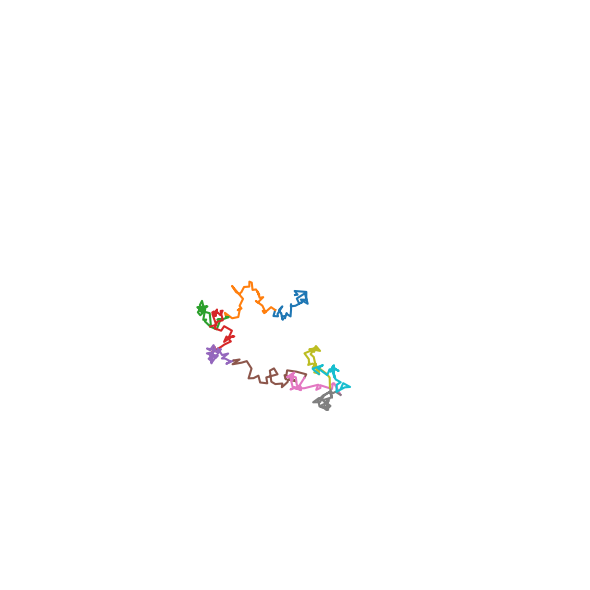

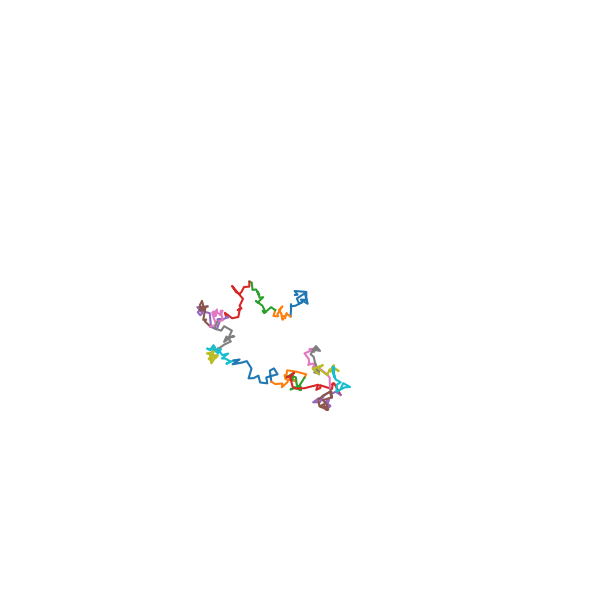

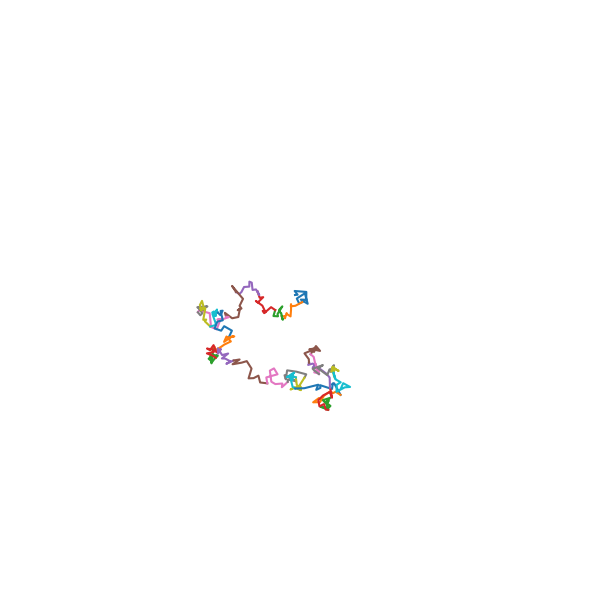

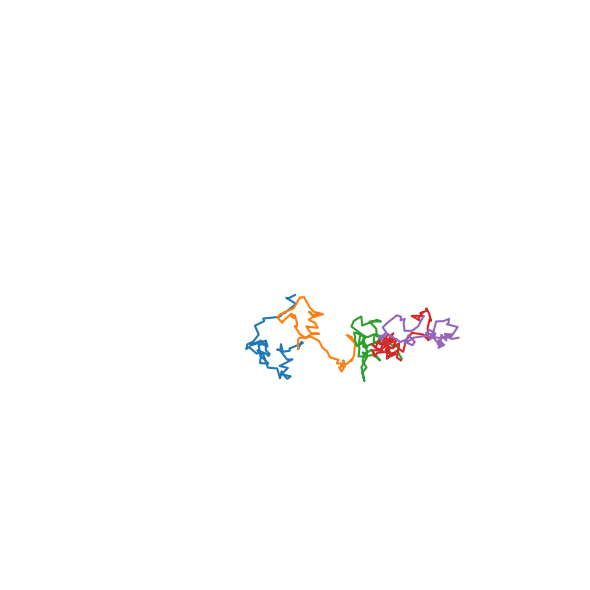

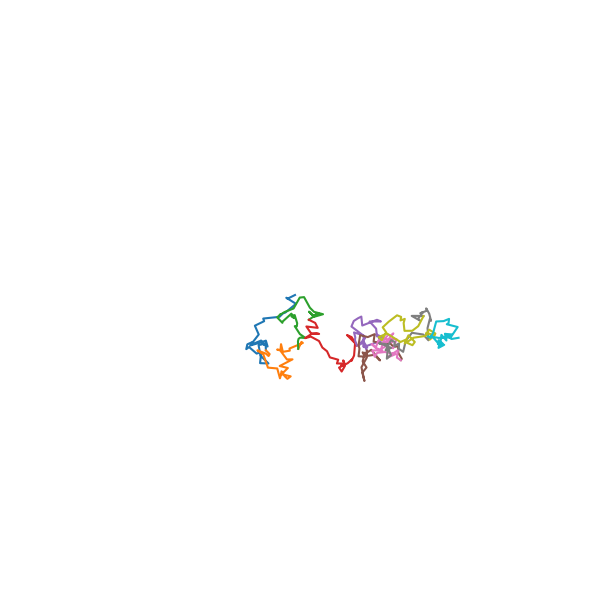

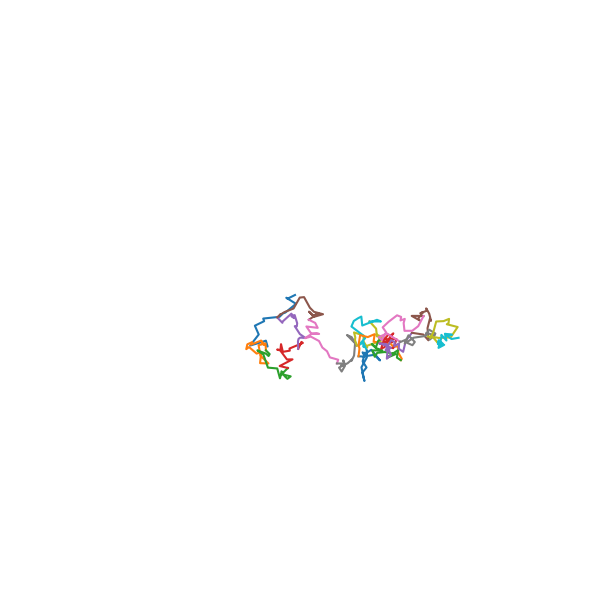

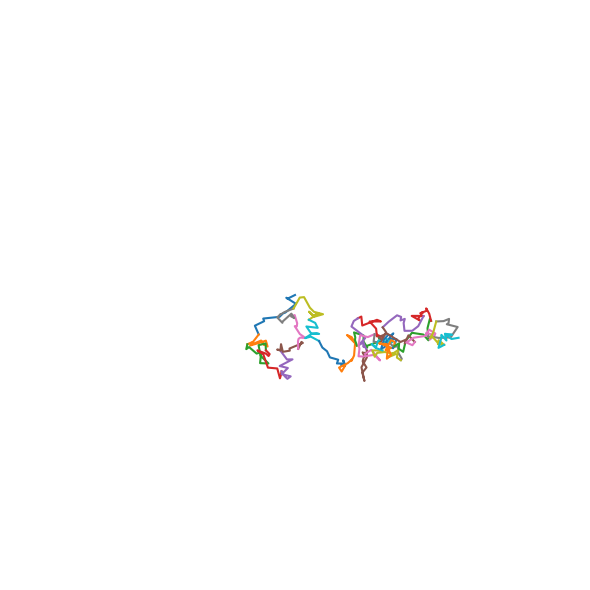

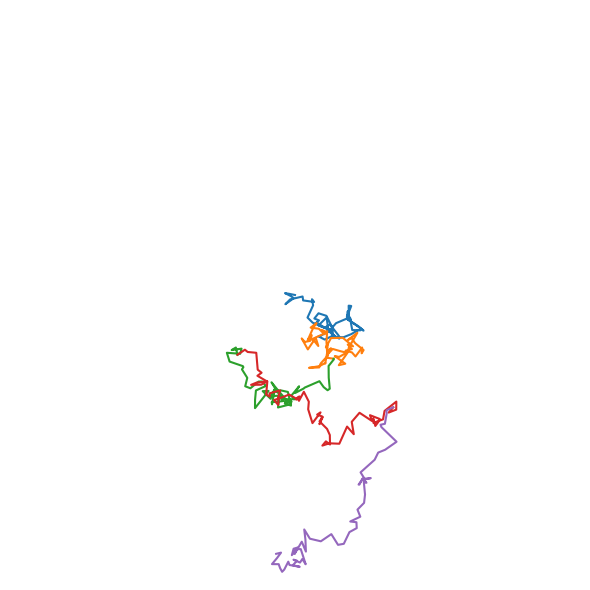

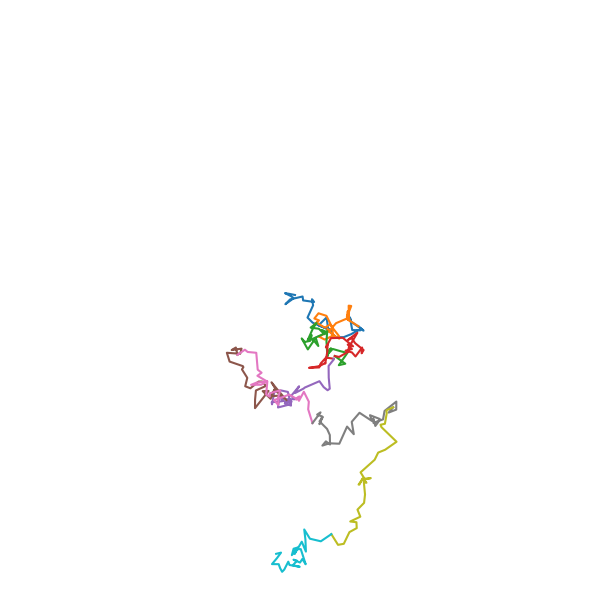

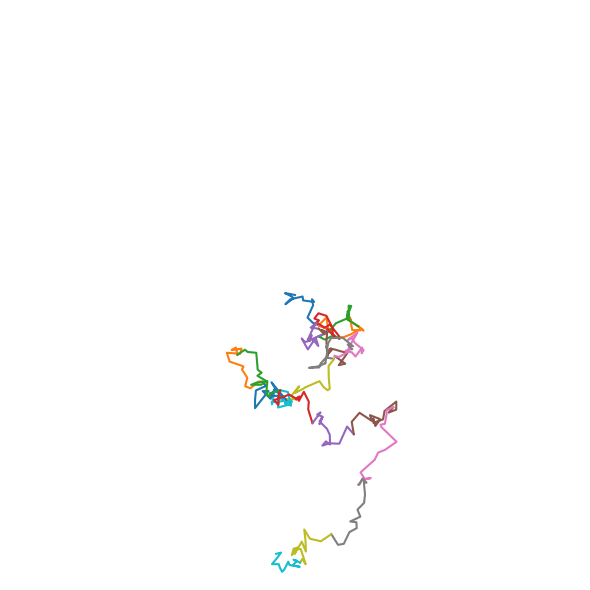

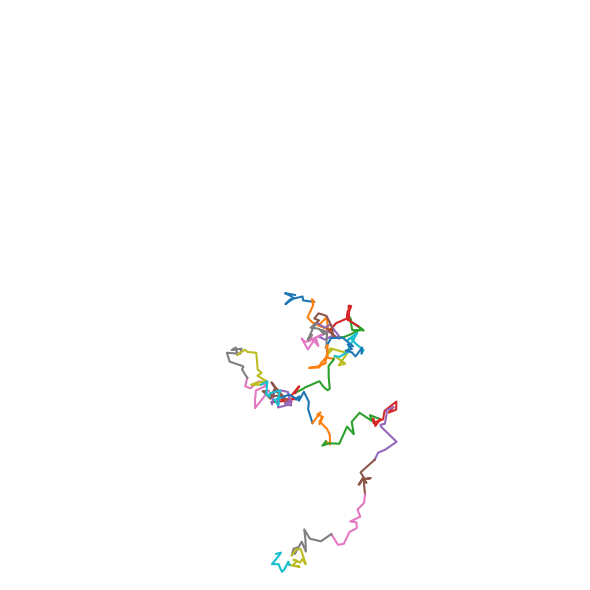

In [42]:
for D in [1,3,5,7,10]:
    traj = np.load(out_dir+f"D{D}/traj.npy")
    for i in [5,10,20,30]:
        subTraj = i
        plot1ParticleTrajectory(traj, subTraj, save_path=out_dir+f"D{D}/traj{subTraj}_scaledbig.png", max_scale=200)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def animate_particle_trajectory(trajectory, nframes, points_per_frame=None, fps=5, save_path=None):
    """
    Creates an animation of a particle's trajectory, showing one subtrajectory per frame.
    No axis labels or ticks for a clean visualization.
    
    Parameters:
    - trajectory: np.ndarray of shape (N, 2), where N is the total number of points.
                 Each row represents the (x, y) coordinates of the particle.
    - nframes: int, number of frames to divide the trajectory into.
    - points_per_frame: int, optional, number of points to show in each frame.
                       If None, it's calculated as len(trajectory) // nframes.
    - fps: int, frames per second for the animation.
    
    Returns:
    - HTML animation that can be displayed in a Jupyter notebook.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Calculate points per frame if not provided
    if points_per_frame is None:
        points_per_frame = len(trajectory) // nframes
    
    # Set consistent axis limits
    x_min, x_max = np.min(trajectory[:, 0]), np.max(trajectory[:, 0])
    y_min, y_max = np.min(-trajectory[:, 1]), np.max(-trajectory[:, 1])
    
    # Find the maximum absolute value to create a symmetric plot
    max_extent = max(
        abs(x_min), 
        abs(x_max), 
        abs(y_min), 
        abs(y_max)
    )
    
    # Add some padding to the limits
    max_extent = max_extent * 1.1  # Add 10% padding
    
    # Set symmetric limits centered at origin
    ax.set_xlim([-max_extent, max_extent])
    ax.set_ylim([-max_extent, max_extent])
    
    # Turn off all axis labeling
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

    # Set up plot elements
    ax.set_aspect('equal')
    
    # Initialize empty line and text objects
    line, = ax.plot([], [], lw=2)
    frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)
    
    # Initialize empty arrays for accumulated trajectory
    x_data, y_data = [], []
    
    def init():
        """Initialize animation"""
        line.set_data([], [])
        frame_text.set_text('')
        return line, frame_text
    
    def update(frame):
        """Update animation for each frame"""
        # Calculate start and end indices for this frame
        start = frame * points_per_frame
        end = min(start + points_per_frame, len(trajectory))
        
        # Get the current trajectory segment
        current_segment = trajectory[start:end]
        
        # Append to accumulated data
        if frame == 0:
            x_data.clear()
            y_data.clear()
        
        x_data.extend(current_segment[:, 0])
        y_data.extend(-current_segment[:, 1])  # Negative y to match your original plot
        
        # Update the line data
        line.set_data(x_data, y_data)
        
        # Update the frame text
        frame_text.set_text(f'Frame {frame + 1}/{nframes}')
        
        return line, frame_text
    
    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=nframes,
                                 init_func=init, blit=True, interval=1000/fps)
    # Save the animation if a save path is provided
    if save_path:
        if save_path.endswith('.mp4'):
            # Use FFMpegWriter for MP4 files (requires FFmpeg installed)
            writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
            ani.save(save_path, writer=writer)
            print(f"Animation saved to {save_path}")
        elif save_path.endswith('.gif'):
            # Use PillowWriter for GIF files
            writer = animation.PillowWriter(fps=fps)
            ani.save(save_path, writer=writer)
            print(f"Animation saved to {save_path}")
        else:
            print("Unsupported file format. Use .mp4 or .gif extension.")
    plt.close()  # Prevent displaying the static plot
    
    return HTML(ani.to_jshtml())

# Example usage:
animate_particle_trajectory(trajs[0], nframes=20, save_path=out_dir+"TrajectoryBlue.gif")

Animation saved to TrajectoryBlue.gif


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.cm import tab20

def animate_particle_trajectory(trajectory, nframes, points_per_frame=None, fps=5, save_path=None):
    """
    Creates an animation of a particle's trajectory, showing one subtrajectory per frame
    with each frame in a different color using the tab20 colormap.
    
    Parameters:
    - trajectory: np.ndarray of shape (N, 2), where N is the total number of points.
                 Each row represents the (x, y) coordinates of the particle.
    - nframes: int, number of frames to divide the trajectory into.
    - points_per_frame: int, optional, number of points to show in each frame.
                       If None, it's calculated as len(trajectory) // nframes.
    - fps: int, frames per second for the animation.
    
    Returns:
    - HTML animation that can be displayed in a Jupyter notebook.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Calculate points per frame if not provided
    if points_per_frame is None:
        points_per_frame = len(trajectory) // nframes
    
    # Set consistent axis limits
    x_min, x_max = np.min(trajectory[:, 0]), np.max(trajectory[:, 0])
    y_min, y_max = np.min(-trajectory[:, 1]), np.max(-trajectory[:, 1])
    
    # Find the maximum absolute value to create a symmetric plot
    max_extent = max(
        abs(x_min), 
        abs(x_max), 
        abs(y_min), 
        abs(y_max)
    )
    
    # Add some padding to the limits
    max_extent = max_extent * 1.1  # Add 10% padding
    
    # Set symmetric limits centered at origin
    ax.set_xlim([-max_extent, max_extent])
    ax.set_ylim([-max_extent, max_extent])
    
    # Set up plot elements
    ax.set_xlabel('X Position (nm)', fontsize=14)
    ax.set_ylabel('Y Position (nm)', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_aspect('equal')
    
    # Initialize empty line objects for each frame segment
    lines = [ax.plot([], [], lw=2, label=f'Frame {i+1}')[0] for i in range(nframes)]
    frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)
    
    # Get colors from tab20 colormap
    colors = tab20.colors[:nframes] if nframes <= 20 else [tab20(i % 20) for i in range(nframes)]
    
    # Set colors for each line
    for i, line in enumerate(lines):
        line.set_color(colors[i])
    
    # Create empty segments data
    segments_data = [[] for _ in range(nframes)]
    
    def init():
        """Initialize animation"""
        for line in lines:
            line.set_data([], [])
        frame_text.set_text('')
        return lines + [frame_text]
    
    def update(frame):
        """Update animation for each frame"""
        current_frame = frame
        
        # Show lines for all frames up to the current one
        for i in range(current_frame + 1):
            if len(segments_data[i]) == 0:  # If this segment hasn't been calculated yet
                # Calculate start and end indices for this segment
                start = max(0,i * points_per_frame -1)
                end = min(start + points_per_frame+1, len(trajectory))
                
                # Store the segment data
                segments_data[i] = (
                    trajectory[start:end, 0],
                    -trajectory[start:end, 1]  # Negative y to match original plot
                )
            
            # Set the data for this line
            lines[i].set_data(*segments_data[i])
        
        # Hide lines for future frames
        for i in range(current_frame + 1, nframes):
            lines[i].set_data([], [])
        
        # Update the frame text
        frame_text.set_text(f'Frame {current_frame + 1}/{nframes}')
        ax.set_title(f'Simulated Trajectory - Frame {current_frame + 1}/{nframes}')

    
        
        return lines + [frame_text]
    
    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=nframes,
                                 init_func=init, blit=True, interval=1000/fps)
    # Save the animation if a save path is provided
    if save_path:
        if save_path.endswith('.mp4'):
            # Use FFMpegWriter for MP4 files (requires FFmpeg installed)
            writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
            ani.save(save_path, writer=writer)
            print(f"Animation saved to {save_path}")
        elif save_path.endswith('.gif'):
            # Use PillowWriter for GIF files
            writer = animation.PillowWriter(fps=fps)
            ani.save(save_path, writer=writer)
            print(f"Animation saved to {save_path}")
        else:
            print("Unsupported file format. Use .mp4 or .gif extension.")
    plt.close()  # Prevent displaying the static plot
    
    return HTML(ani.to_jshtml())

# Example usage:
# trajectory = np.random.normal(0, 1, size=(400, 2)).cumsum(axis=0)  # Example random walk
animate_particle_trajectory(trajs[0], nframes=20, save_path=out_dir+'TrajectoryColors.mp4')


Animation saved to TrajectoryColors.mp4
